In [2]:
pip install opencv-contrib-python

     |████████████████████████████████| 64.1 MB 37 kB/s  eta 0:00:01     |███████████                     | 21.9 MB 5.8 MB/s eta 0:00:08     |████████████████████████▌       | 49.0 MB 6.7 MB/s eta 0:00:03     |██████████████████████████████▍ | 60.8 MB 2.5 MB/s eta 0:00:02
Note: you may need to restart the kernel to use updated packages.


In [65]:
%matplotlib inline

import numpy as np
import cv2 
from matplotlib import pyplot as plt


In [328]:
# Load YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [329]:
# Loading image
img = cv2.imread("crowded-bus.jpg")
img = cv2.resize(img, None, fx=0.8, fy=0.8)
height, width, channels = img.shape
print(height, width)

852 1040


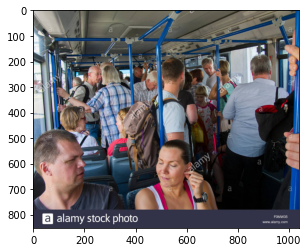

In [330]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [331]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, .00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

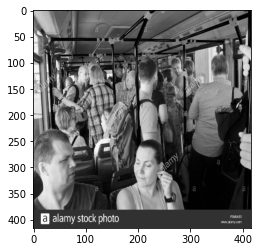

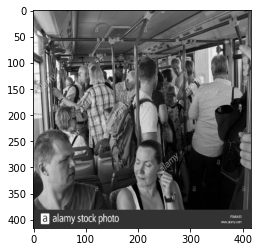

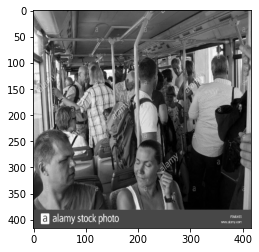

In [332]:
for b in blob:
    for n, img_blob in enumerate(b):
        plt.imshow(cv2.cvtColor(img_blob, cv2.COLOR_BGR2RGB))
        plt.show()

In [333]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.01 and class_id==0:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [334]:
print(len(boxes))

55


In [335]:
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [336]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.1, 0.09)
print(len(indexes))

12


In [337]:
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        confidence = round(confidences[i], 2)
        cv2.putText(img, str(confidence), (x, y + 30), font, 3, color, 3)
#         cv2.putText(img, label, (x, y + 30), font, 3, color, 3)


In [338]:

cv2.putText(img, f'PERSONS: {len(indexes)}', (10, 35), font, 3, (0, 0, 255), 3)

array([[[194, 202, 202],
        [194, 202, 202],
        [195, 203, 203],
        ...,
        [159,  89,   0],
        [161,  91,   0],
        [162,  93,   0]],

       [[190, 198, 198],
        [193, 201, 201],
        [195, 203, 203],
        ...,
        [159,  89,   0],
        [160,  90,   0],
        [162,  93,   0]],

       [[187, 193, 193],
        [193, 199, 200],
        [198, 204, 205],
        ...,
        [159,  89,   0],
        [160,  90,   0],
        [162,  93,   0]],

       ...,

       [[ 72,  51,  50],
        [ 72,  51,  50],
        [ 72,  51,  50],
        ...,
        [ 72,  51,  50],
        [ 72,  51,  50],
        [ 72,  51,  50]],

       [[ 72,  51,  50],
        [ 72,  51,  50],
        [ 72,  51,  50],
        ...,
        [ 72,  51,  50],
        [ 72,  51,  50],
        [ 72,  51,  50]],

       [[ 72,  51,  50],
        [ 72,  51,  50],
        [ 72,  51,  50],
        ...,
        [ 72,  51,  50],
        [ 72,  51,  50],
        [ 72,  51,  50]]

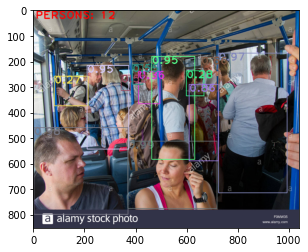

In [339]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()